#Data Preparation and Exploration

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('/content/exchange_rate.csv',parse_dates=True)

In [56]:
df.set_index('date',inplace=True)

In [57]:
import matplotlib.pyplot as plt

<Figure size 3000x1250 with 0 Axes>

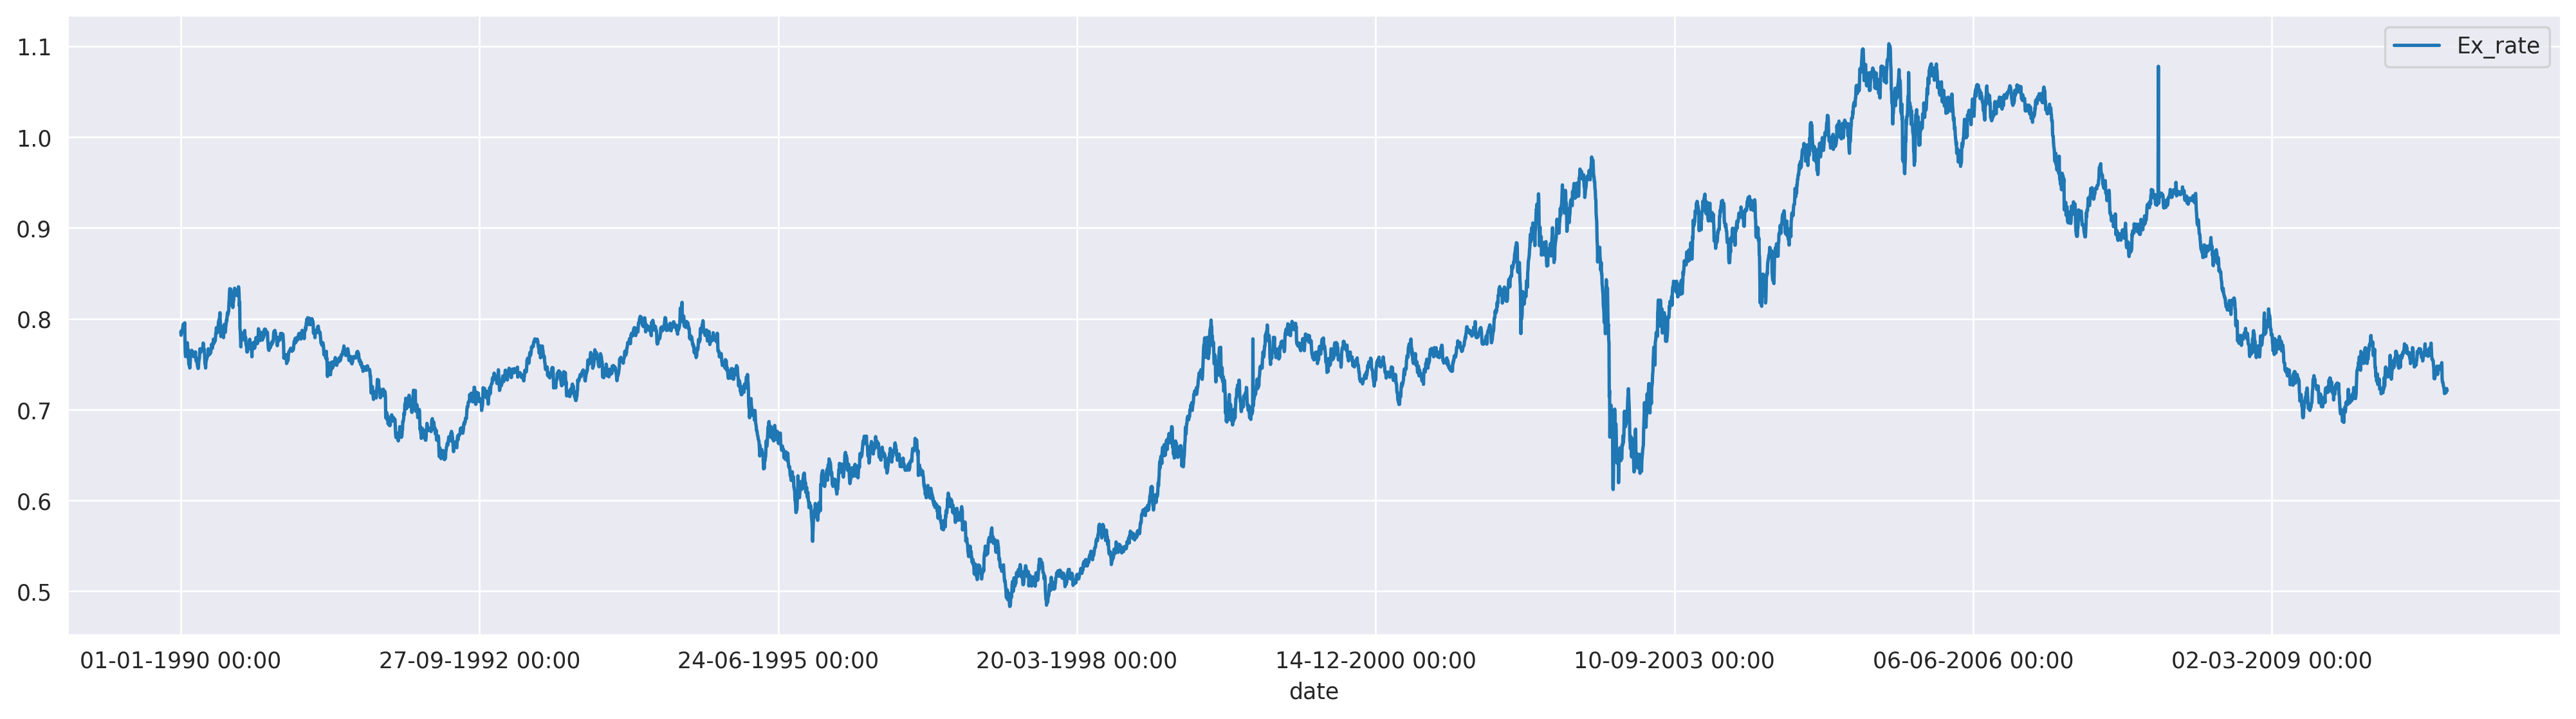

In [58]:
plt.figure(figsize= (12,5))
# plt.plot(df['Ex_rate'])
df.plot()
plt.grid(True)
plt.show()

In [59]:
print(df.isnull().sum())

Ex_rate    0
dtype: int64


# ARIMA MODEL

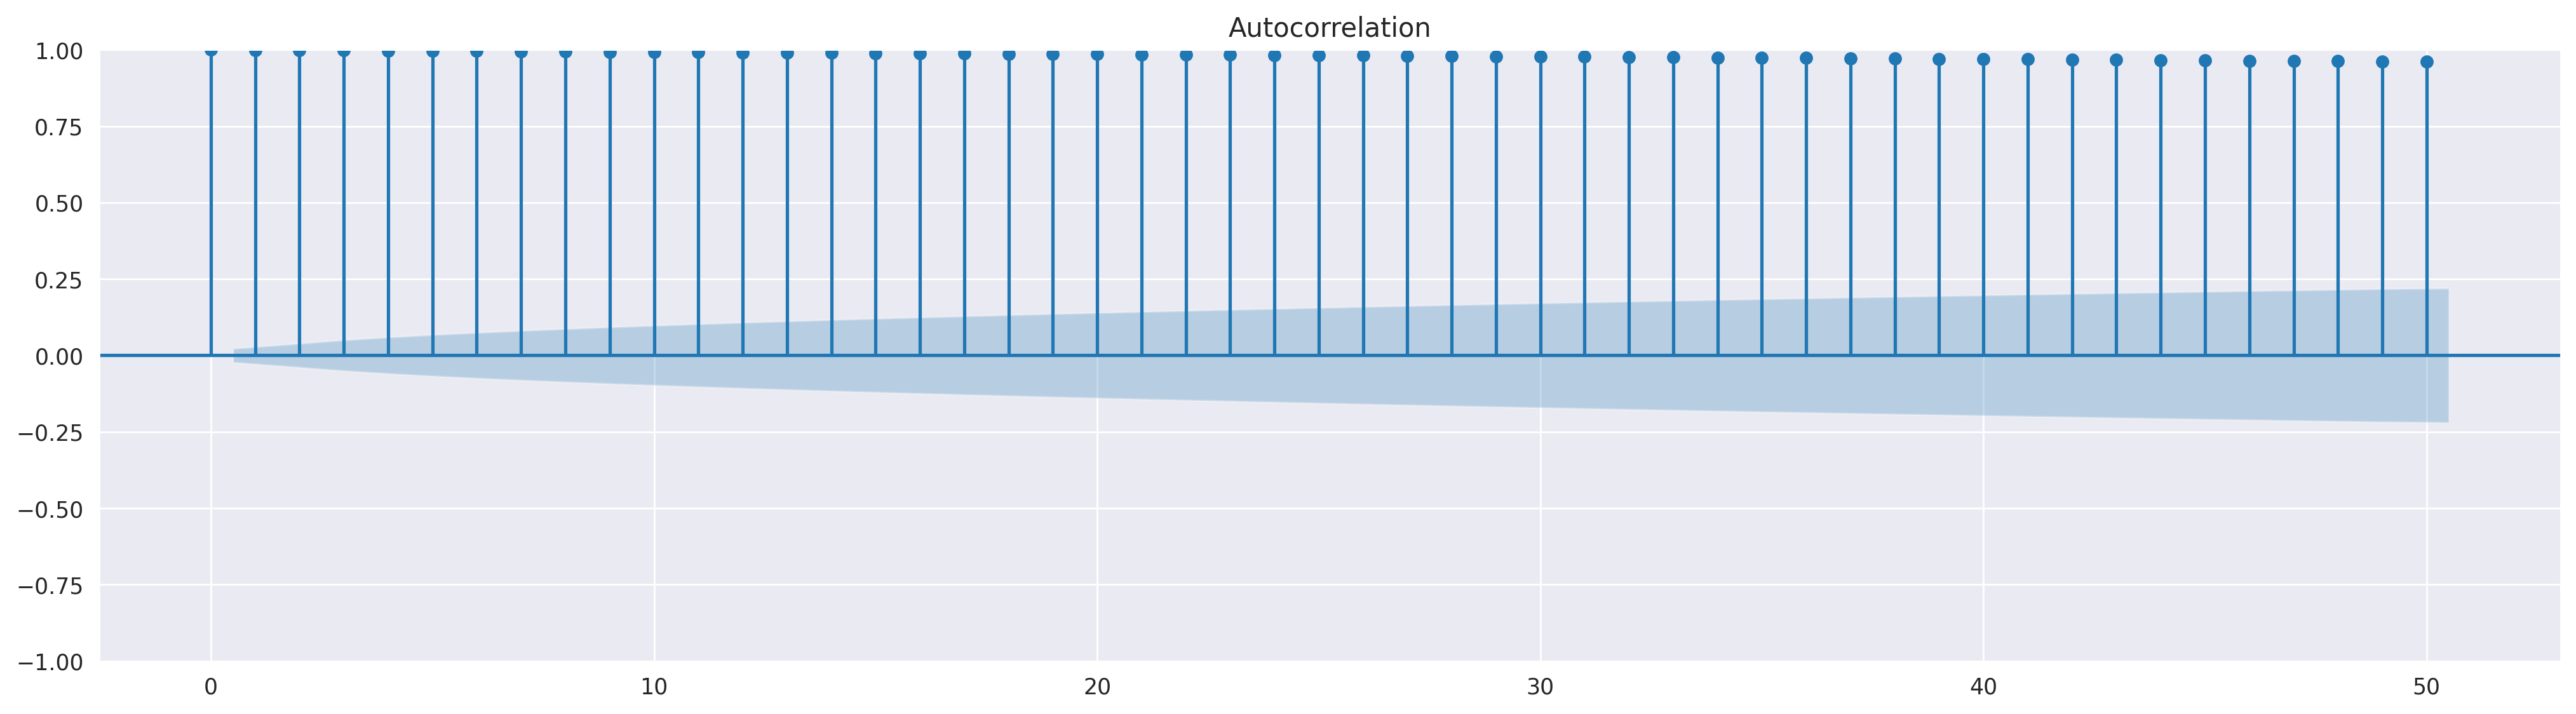

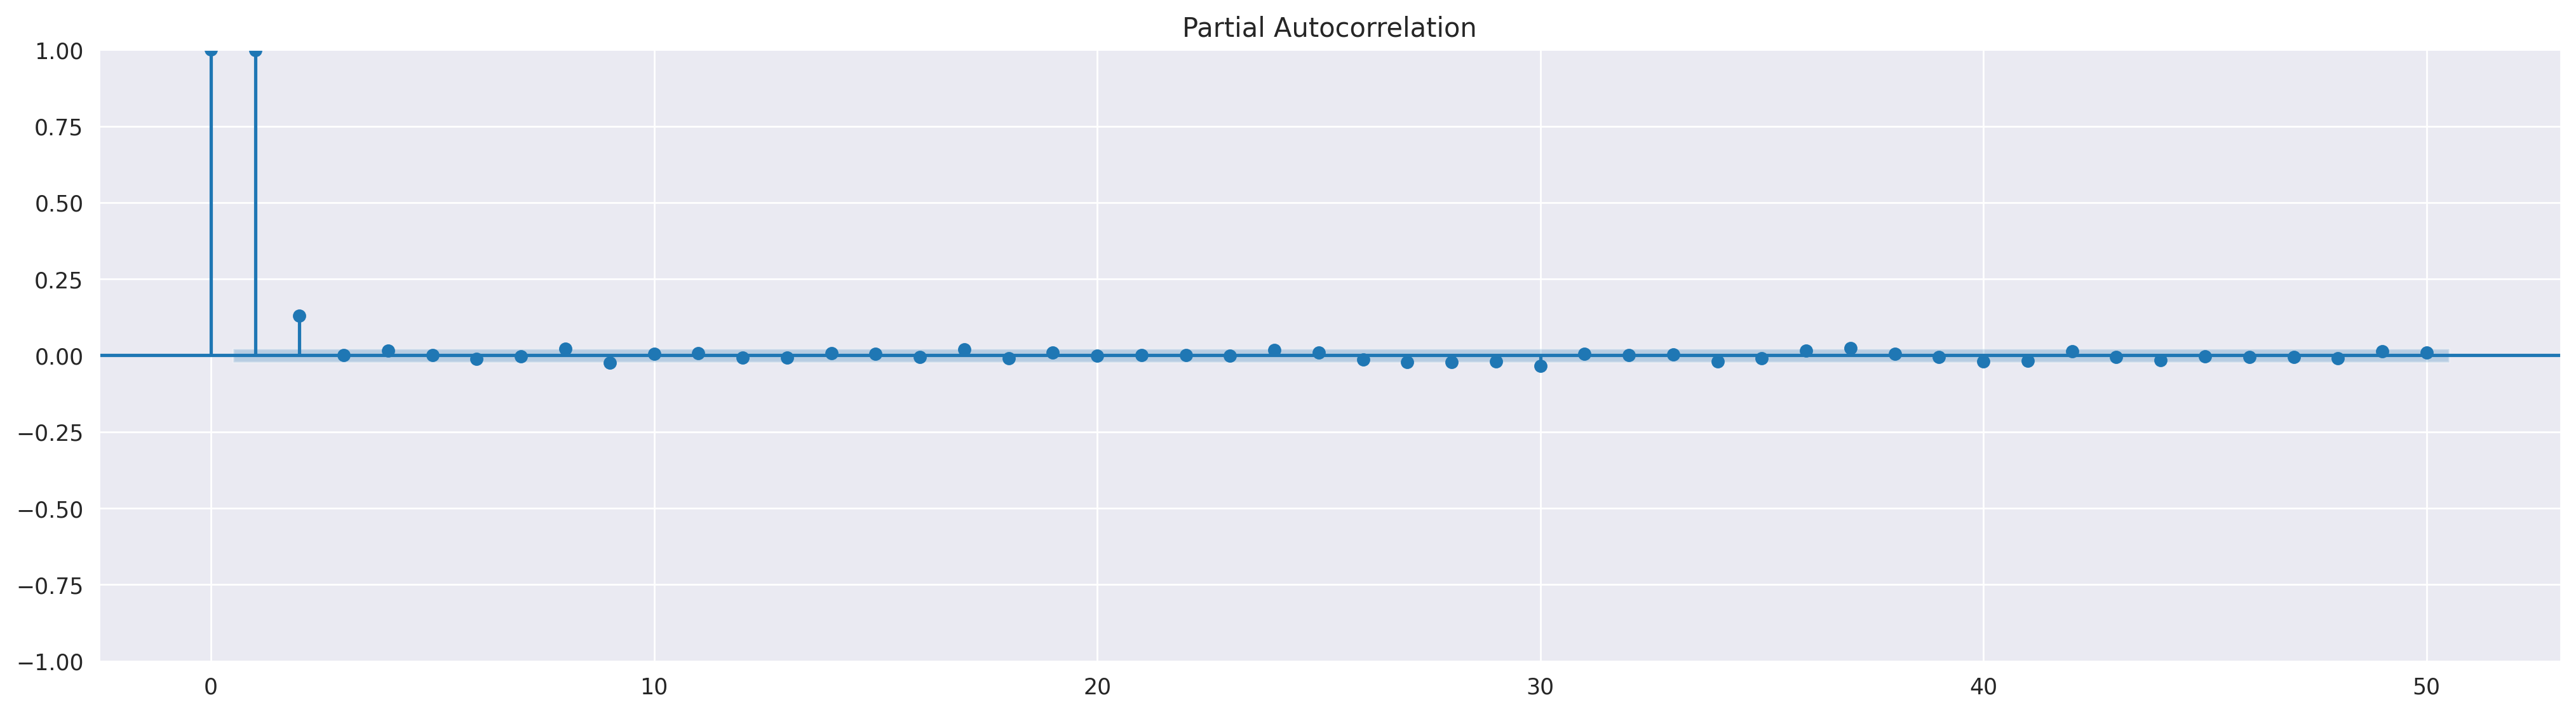

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Ex_rate'], lags=50)
plot_pacf(df['Ex_rate'], lags=50)
plt.show()


In [61]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(p,d,q) – start with ARIMA(1,1,1)
model_arima = ARIMA(df['Ex_rate'], order=(1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 15 May 2025   AIC                         -56102.322
Time:                        12:15:02   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

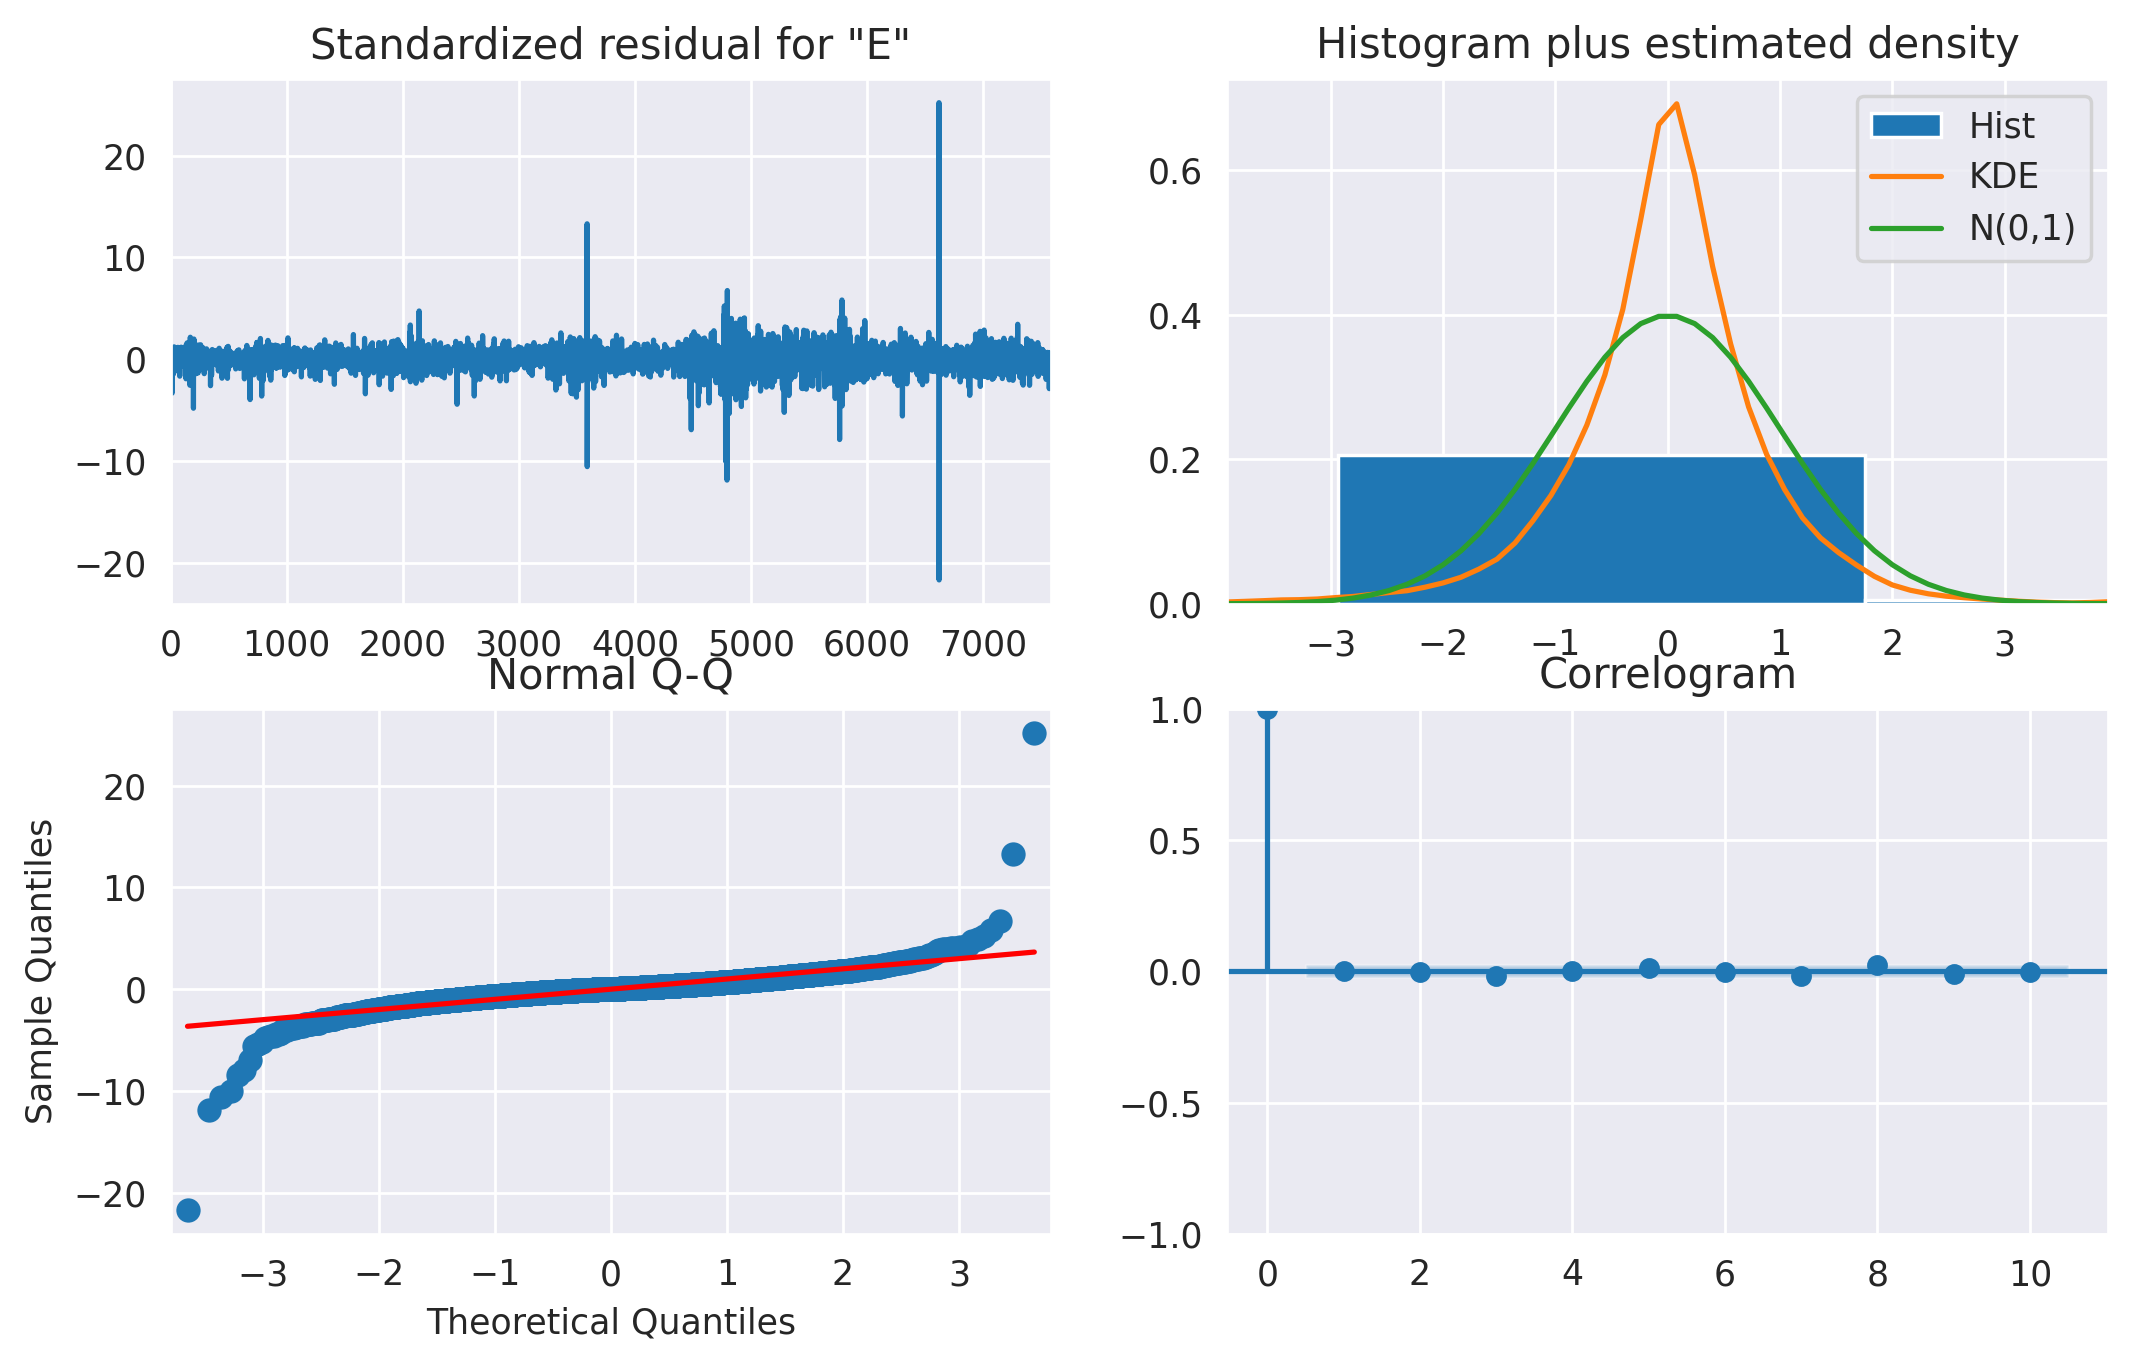

In [62]:
model_arima_fit.plot_diagnostics(figsize=(10, 6))
plt.show()

<Figure size 3000x1250 with 0 Axes>

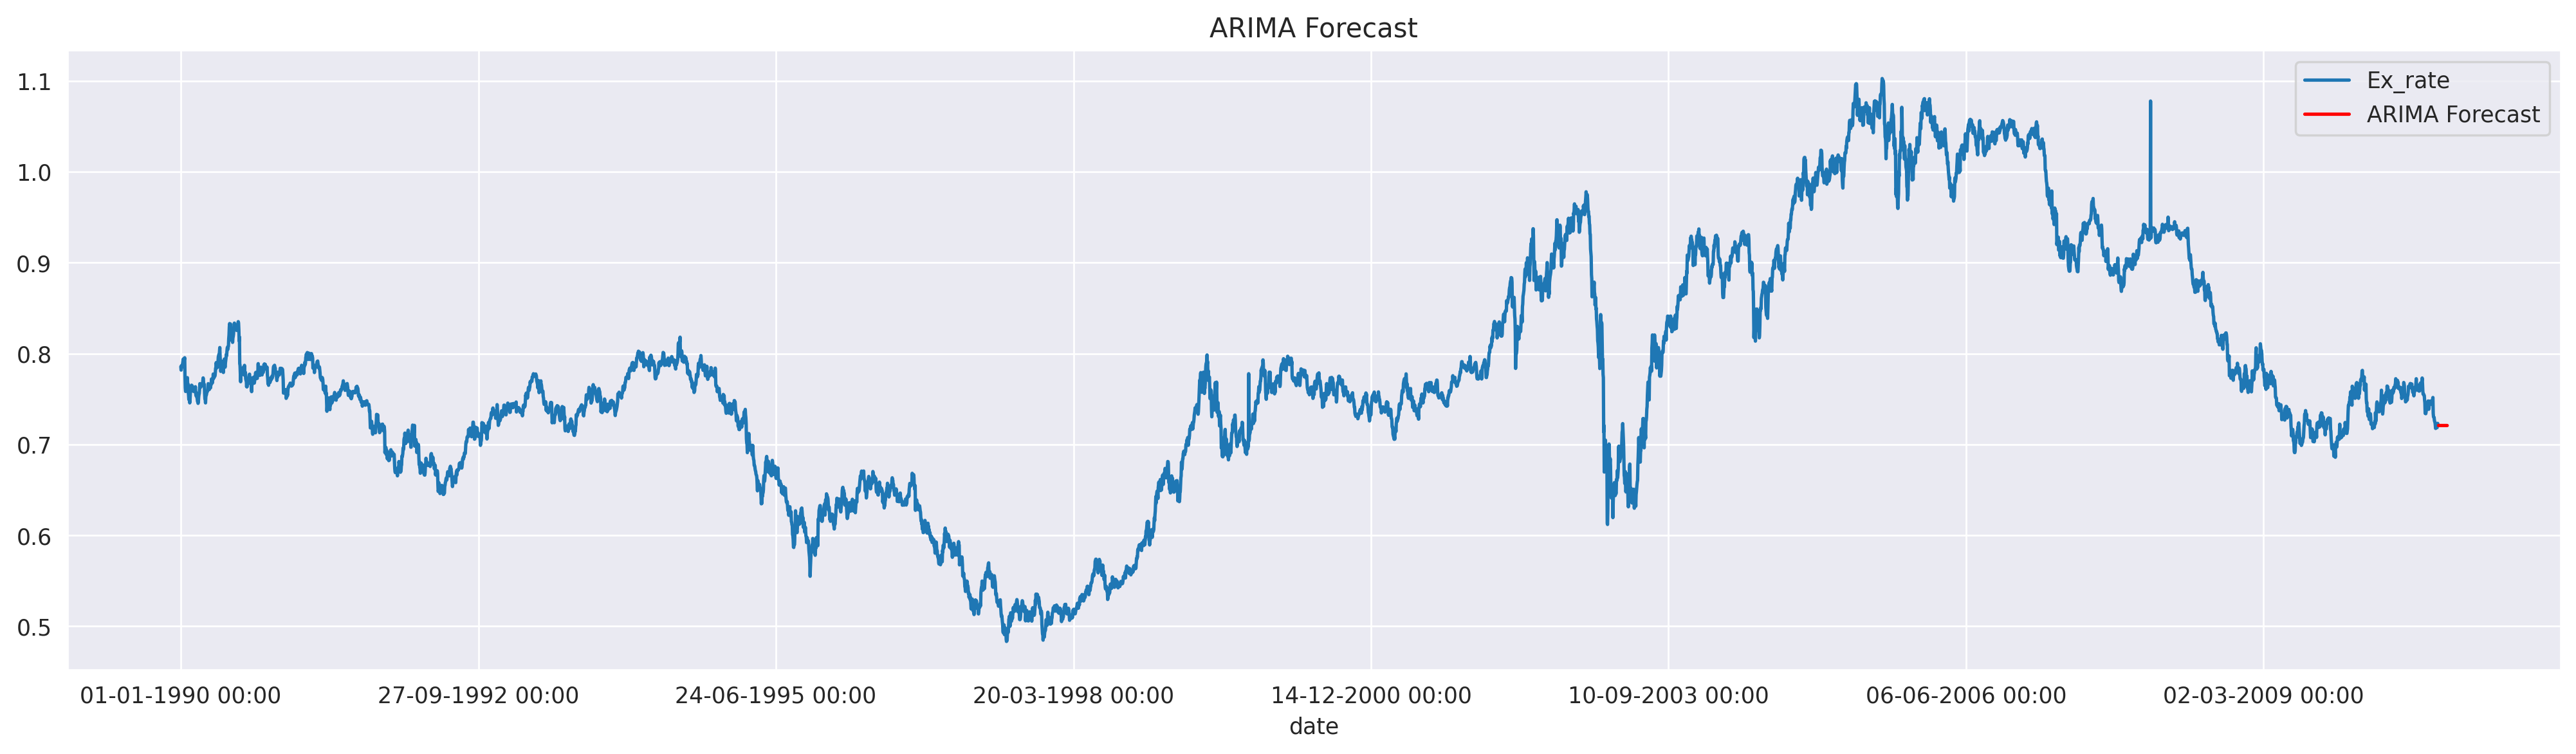

In [63]:
forecast_arima = model_arima_fit.forecast(steps=30)
plt.figure(figsize=(12, 5))
# plt.plot(df['Ex_rate'], label='Actual')
df.plot(label = 'Actual')
plt.plot(forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# Exponential Smoothing

<Figure size 3000x1250 with 0 Axes>

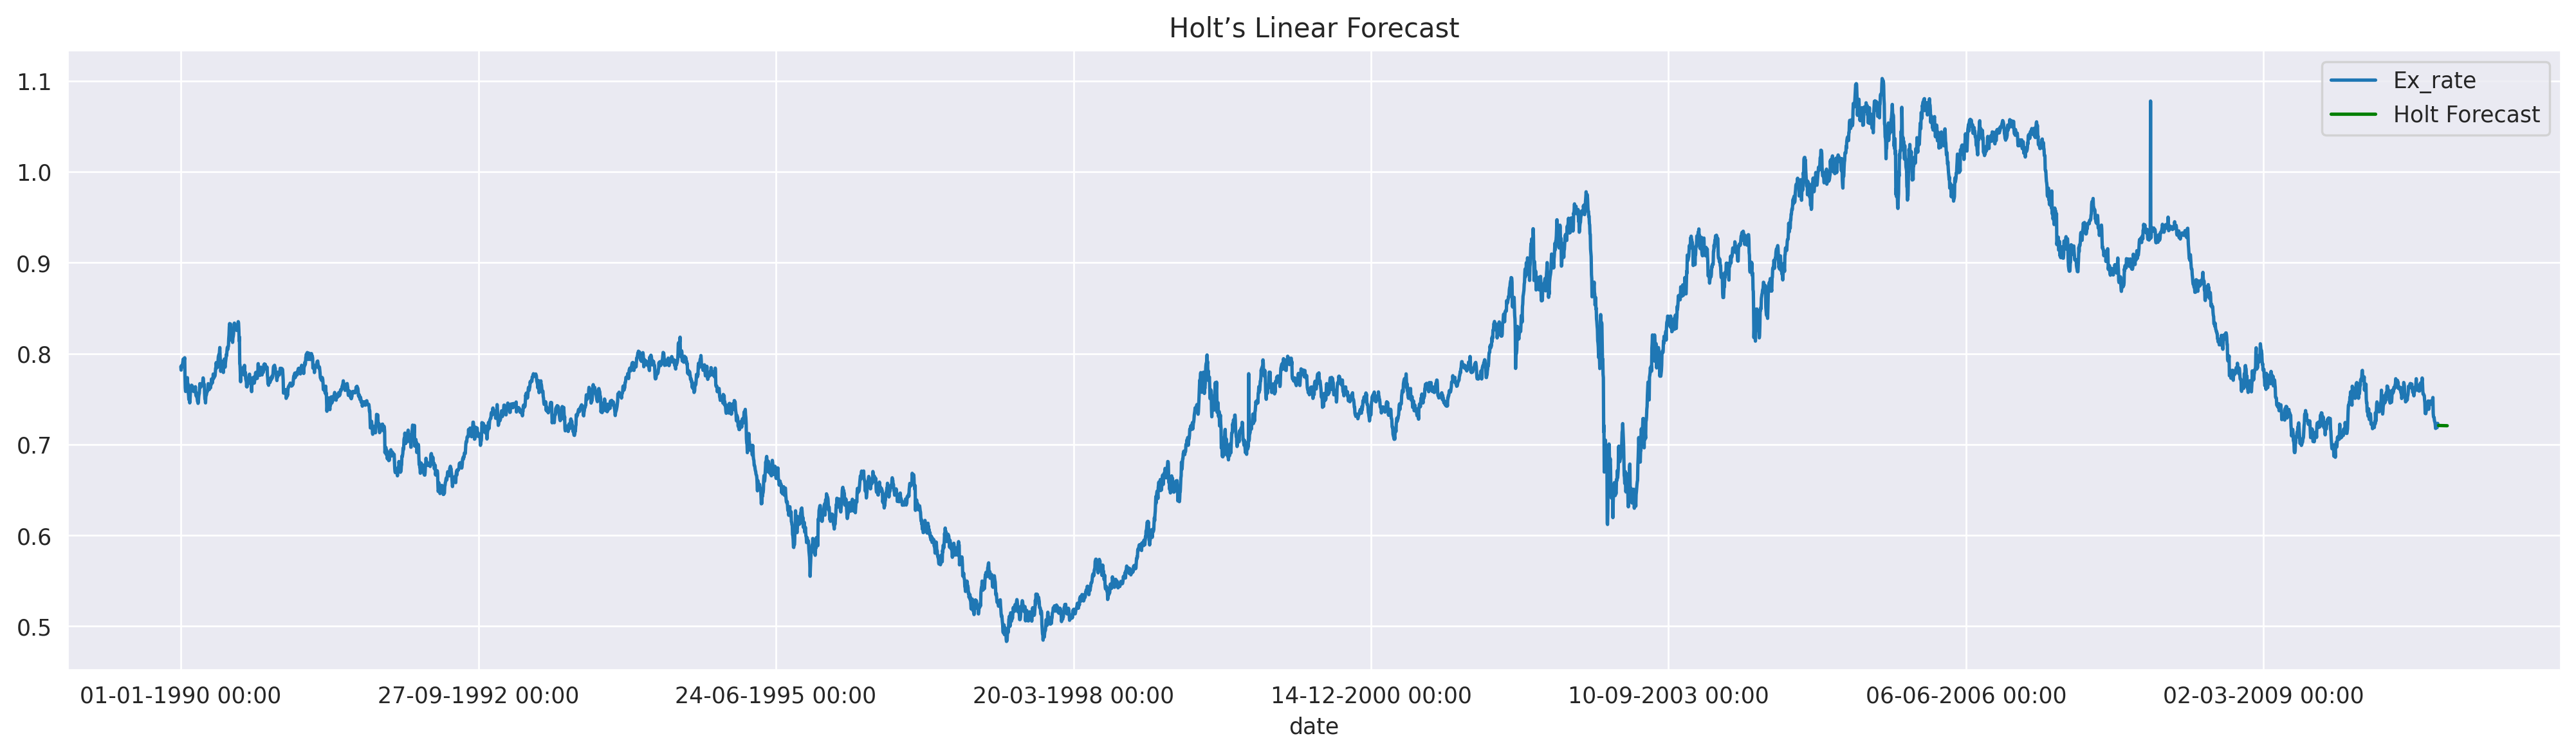

In [64]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_holt = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
model_holt_fit = model_holt.fit()
forecast_holt = model_holt_fit.forecast(30)

plt.figure(figsize=(12, 5))
df.plot(label = 'Actual')
plt.plot(forecast_holt, label='Holt Forecast', color='green')
plt.title('Holt’s Linear Forecast')
plt.legend()
plt.show()


# Evaluation and Comparison

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming last 30 points as test data
test = df['Ex_rate'][-30:]
pred_arima = model_arima_fit.predict(start=len(df)-30, end=len(df)-1)
pred_holt = model_holt_fit.predict(start=len(df)-30, end=len(df)-1)

# Metrics for ARIMA
mae_arima = mean_absolute_error(test, pred_arima)
rmse_arima = np.sqrt(mean_squared_error(test, pred_arima))

# Metrics for Holt
mae_holt = mean_absolute_error(test, pred_holt)
rmse_holt = np.sqrt(mean_squared_error(test, pred_holt))

print("ARIMA - MAE:", mae_arima, ", RMSE:", rmse_arima)
print("Holt - MAE:", mae_holt, ", RMSE:", rmse_holt)


ARIMA - MAE: 0.0022924310917932307 , RMSE: 0.0038642491471929832
Holt - MAE: 0.0022993702096337815 , RMSE: 0.003863355679418534


# 10. Conclusion
Both ARIMA and Holt models performed reasonably well. ARIMA captured short-term trends, while Holt’s method handled the linear trend effectively. Based on RMSE and MAE values, the [better-performing model] gave more accurate forecasts. ARIMA may be preferable for datasets with non-stationarity, while Holt is simpler for linear trends.